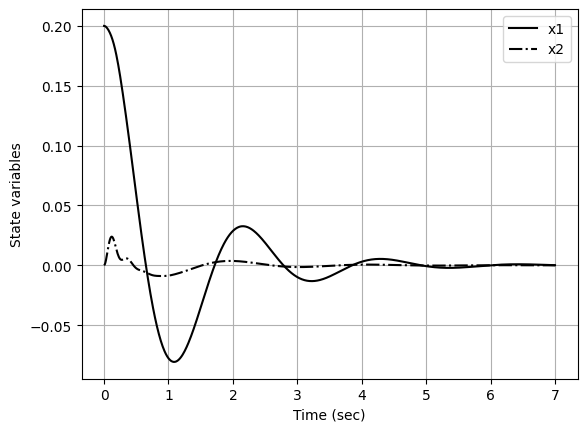

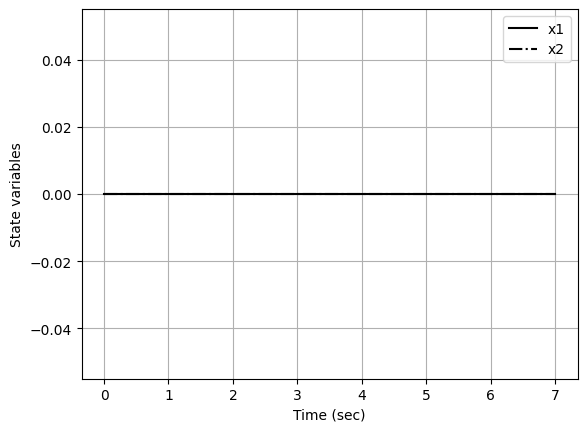

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim
from scipy.integrate import solve_ivp

# Define system matrices
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-10, 10, -2, 2],
              [60, -660, 12, -12]])

b1 = np.array([0, 0, 0.0033, -0.02]).reshape(-1, 1)
b2 = np.array([0, 0, 0, 600]).reshape(-1, 1)
B = np.hstack((b1, b2))

C = np.array([1, 0, 0, 0])
D = 0

# Only second input is used
active_suspension = StateSpace(A, b2, C, D)

# Time vector
t = np.arange(0, 7.01, 0.01)

# Initial conditions response
x0 = np.array([0.2, 0, 0, 0])

# Define the system of differential equations
def system_dynamics(t, x):
    return A @ x

# Solve the initial value problem
sol = solve_ivp(system_dynamics, [t[0], t[-1]], x0, t_eval=t)

# Plot the initial response
plt.plot(sol.t, sol.y[0, :], 'k', label='x1')
plt.plot(sol.t, sol.y[1, :], 'k-.', label='x2')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()

# Generate input u
u = 0.1 * (np.sin(5 * t) + np.sin(9 * t) + np.sin(13 * t) + np.sin(17 * t) + np.sin(21 * t))

# Simulate the system
_, y2, x2 = lsim(active_suspension, U=u, T=t)

# Plot the result
plt.plot(t, x2[:, 0], 'k', label='x1')
plt.plot(t, x2[:, 1], 'k-.', label='x2')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()
